<a href="https://colab.research.google.com/github/sunilhucharaddi/fastai-v3/blob/master/pets_more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Lesson 6:pets revisited**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [0]:
bs = 64

In [5]:
path = untar_data(URLs.PETS)/'images'

**Data augmentation**

In [0]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [0]:
doc(get_transforms)

In [0]:
src= ImageList.from_folder(path).split_by_rand_pct(0.2, seed=2)

In [0]:
def get_data(size, bs, padding_mode='reflection'):
  return(src.label_from_re(r'([^/]+)_\d+.jpg$')
        .transform(tfms, size=size, padding_mode= padding_mode)
        .databunch(bs=bs).normalize(imagenet_stats))

In [0]:
data= get_data(224, bs, 'zeros')

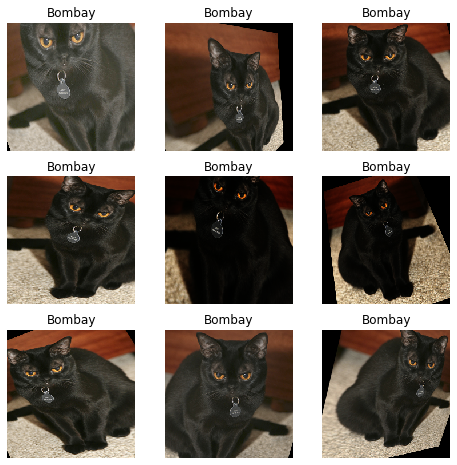

In [17]:
def _plot(i,j,ax):
  x,y = data.train_ds[0]
  x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

In [0]:
data =get_data(224,bs)

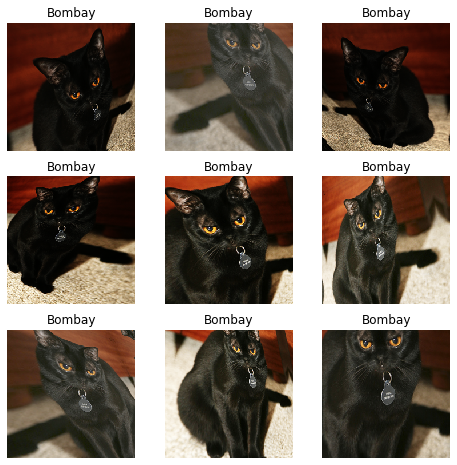

In [19]:
plot_multi(_plot,3,3,figsize=(8,8))

**Train a model**

In [21]:
gc.collect()

27373

In [25]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, bn_final=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


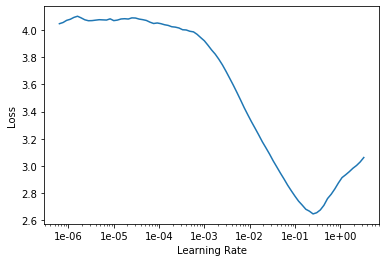

In [26]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(3,slice(1e-2),pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,1.641118,0.366035,0.091340,01:37
1,0.960880,0.269137,0.081867,01:34
2,0.726755,0.246814,0.075101,01:32


In [28]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-3),pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.580075,0.242697,0.070365,01:34
1,0.534256,0.241398,0.070365,01:34


In [0]:
data = get_data(352,bs)
learn.data =data

In [30]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.506300,0.219097,0.055480,02:50
1,0.489333,0.211759,0.050068,02:50


In [0]:
learn.save('352')

**Convolution kernel**

In [0]:
data = get_data(352,16)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, bn_final=True).load('352')

Category american_pit_bull_terrier

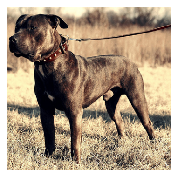

In [34]:
idx=0
x,y = data.valid_ds[idx]
x.show()
data.valid_ds.y[idx]

In [0]:
k = tensor([
            [0. ,-5/3,1],
            [-5/3,-5/3,1],
            [1. ,1    ,1],
            ]).expand(1,3,3,3)/6

In [37]:
k.shape

torch.Size([1, 3, 3, 3])

In [40]:
t = data.valid_ds[0][0].data;t.shape

torch.Size([3, 352, 352])

In [41]:
t[None].shape

torch.Size([1, 3, 352, 352])

In [0]:
edge = F.conv2d(t[None],k)

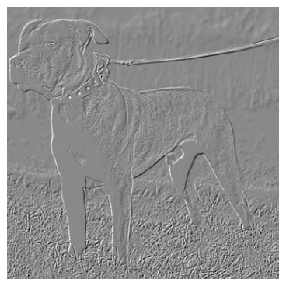

In [43]:
show_image(edge[0], figsize=(5,5));

In [44]:
data.c

37

In [45]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [47]:
print(learn.summary)

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352)
y: CategoryList
Bombay,chihuahua,staffordshire_bull_terrier,great_pyrenees,miniature_pinscher
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352)
y: CategoryList
american_pit_bull_terrier,japanese_chin,boxer,samoyed,saint_bernard
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBl

**Heat Map**

In [0]:
m = learn.model.eval();

In [0]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [0]:
from fastai.callbacks.hooks import *

In [0]:
def hooked_backward(cat=y):
  with hook_output(m[0]) as hook_a:
    with hook_output(m[0], grad=True) as hook_g:
      preds = m(xb)
      preds[0,int(cat)].backward()
  return hook_a,hook_g

In [0]:
hook_a,hook_g = hooked_backward()

In [53]:
acts = hook_a.stored[0].cpu()
acts.shape

torch.Size([512, 11, 11])

In [54]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([11, 11])

In [0]:
def show_heatmap(hm):
  _,ax = plt.subplots()
  xb_im.show(ax)
  ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
            interpolation='bilinear',cmap='magma');

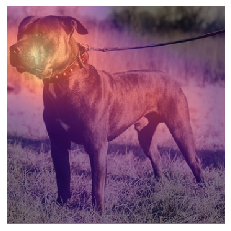

In [56]:
show_heatmap(avg_acts)

**Grad-CAM**
Paper:[link](https://arxiv.org/abs/1610.02391)

In [57]:
grad = hook_g.stored[0][0].cpu()
grad_chan = grad.mean(1).mean(1)
grad.shape,grad_chan.shape

(torch.Size([512, 11, 11]), torch.Size([512]))

In [0]:
mult = (acts*grad_chan[...,None,None]).mean(0)

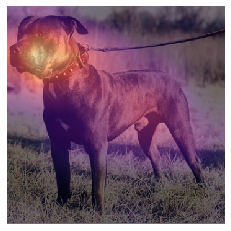

In [59]:
show_heatmap(mult)

In [0]:
fn = path/'../other/bulldog_maine.jpg' #replace with your own image